# Regression Model

**Purpose of script:**

- Test regression model suitability in data fusion context
- Test different regressors

## Data Prep

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

# custom functions:
from functions import read_and_prep_parquet, get_rmse, convert_to_tif, save_prediction_tif

In [2]:
df_path = r"../Data/combined/pandas_extended/"
out_path =  r"../Data/results/regression/"


In [3]:
# X_train, y_train = read_and_prep_parquet(df_path + 'melt_2019-07-01_extended.parquet.gzip', 'train')
# #X_test, y_test = read_and_prep_parquet(df_path + 'melt_2019-07-02_extended.parquet.gzip', 'test')
# X_pred = read_and_prep_parquet(df_path + 'melt_2019-07-01_extended.parquet.gzip', 'predict')

# Train:
train_datelist = pd.date_range(start="2019-06-01",end="2019-06-30")
train_datelist = [str(day.date()) for day in train_datelist]

X_train_df_list = []
y_train_df_list = []

for day in train_datelist:
    try: # bc some days are empty
        X_train, y_train = read_and_prep_parquet(df_path + 'melt_' + day + '_extended.parquet.gzip', 'train')
        X_train_df_list.append(X_train)
        y_train_df_list.append(y_train)
    except:
        continue


X_train = pd.concat(X_train_df_list, axis=0)
y_train = pd.concat(y_train_df_list, axis=0)

del X_train_df_list
del y_train_df_list

In [4]:
# Test:

test_datelist = pd.date_range(start="2019-07-01",end="2019-07-14")
test_datelist = [str(day.date()) for day in test_datelist]

X_test_df_list = []
y_test_df_list = []

for day in test_datelist:
    try: # bc some days are empty
        X_train, y_train = read_and_prep_parquet(df_path + 'melt_' + day + '_extended.parquet.gzip', 'train')
        X_test_df_list.append(X_train)
        y_test_df_list.append(y_train)
    except:
        continue


X_test = pd.concat(X_test_df_list, axis=0)
y_test = pd.concat(y_test_df_list, axis=0)

del X_test_df_list
del y_test_df_list

### Decision tree regressor

In [5]:
from sklearn.tree import DecisionTreeRegressor

In [6]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=0)

In [7]:
y_predicted = regressor.predict(X_test)


In [8]:
rmse = get_rmse(y_test, y_predicted)
rmse # 
DecisionTreeRegressor
DecisionTreeRegressor(random_state=0)

0.3189757865700869

0.3189757865700869

Predict

In [28]:
prediction_date = '2019-07-31' # do one next day and one for tha last day of July

# get rmse
X_get_rmse, y_get_rmse = read_and_prep_parquet(df_path + 'melt_' + prediction_date + '_extended.parquet.gzip', 'validate')
print(f'Nan percentage: {len(X_get_rmse)/(2663*1462)}')
y_predicted_get_rmse= regressor.predict(X_get_rmse)
X_get_rmse['prediction'] = y_predicted_get_rmse 
rmse = get_rmse(y_get_rmse, y_predicted_get_rmse)
print(f'RMSE:{rmse} for {prediction_date}')

# write prediction:
X_pred = read_and_prep_parquet(df_path + 'melt_2019-07-15_extended.parquet.gzip', 'predict') 
y_predicted_out = regressor.predict(X_pred)
path_out = out_path + 'decision_tree/' + 'dtr_' + prediction_date + '.tif'
save_prediction_tif(X_pred, y_predicted_out, path_out)


Nan percentage: 0.24224605001507715
RMSE:0.8195367451929445 for 2019-07-31


2278725it [01:44, 21806.75it/s]


Nan percentage: 0.37223634617982765

RMSE:0.24874936224789274 for 2019-07-15

-- 

Nan percentage: 0.24224605001507715

RMSE:0.8195367451929445 for 2019-07-31

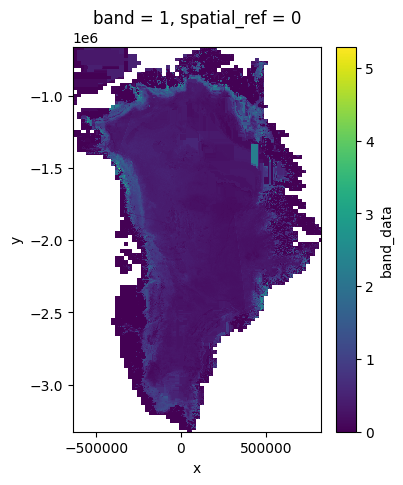

In [29]:
#test opening and plotting
import xarray
test_data_tif = xarray.open_dataarray(path_out)
fig, axes = plt.subplots(ncols=1, figsize=(4,5))
test_data_tif.plot(ax=axes)
plt.draw()


### Linear regression

In [30]:
from sklearn.linear_model import LinearRegression


In [31]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
target_predicted = linear_model.predict(X_test)

In [32]:
rmse = np.sqrt(mean_squared_error(y_test, target_predicted))
rmse

0.3431352145214241

In [34]:
prediction_date = '2019-07-15' # do one next day and one for tha last day of July

# get rmse
X_get_rmse, y_get_rmse = read_and_prep_parquet(df_path + 'melt_' + prediction_date + '_extended.parquet.gzip', 'validate')
print(f'Nan percentage: {len(X_get_rmse)/(2663*1462)}')
y_predicted_get_rmse= linear_model.predict(X_get_rmse)
X_get_rmse['prediction'] = y_predicted_get_rmse 
rmse = get_rmse(y_get_rmse, y_predicted_get_rmse)
print(f'RMSE:{rmse} for {prediction_date}')

# write prediction:
X_pred = read_and_prep_parquet(df_path + 'melt_2019-07-15_extended.parquet.gzip', 'predict') 
y_predicted_out = linear_model.predict(X_pred)
path_out = out_path + 'linear_regression/' + 'lr_' + prediction_date + '.tif'
save_prediction_tif(X_pred, y_predicted_out, path_out)

Nan percentage: 0.37223634617982765
RMSE:0.31511359045997295 for 2019-07-15


2278725it [01:45, 21605.24it/s]


Nan percentage: 0.37223634617982765

RMSE:0.31511359045997295 for 2019-07-15

--

Nan percentage: 0.24224605001507715

RMSE:0.7893749674094381 for 2019-07-31